Plotting footprint.


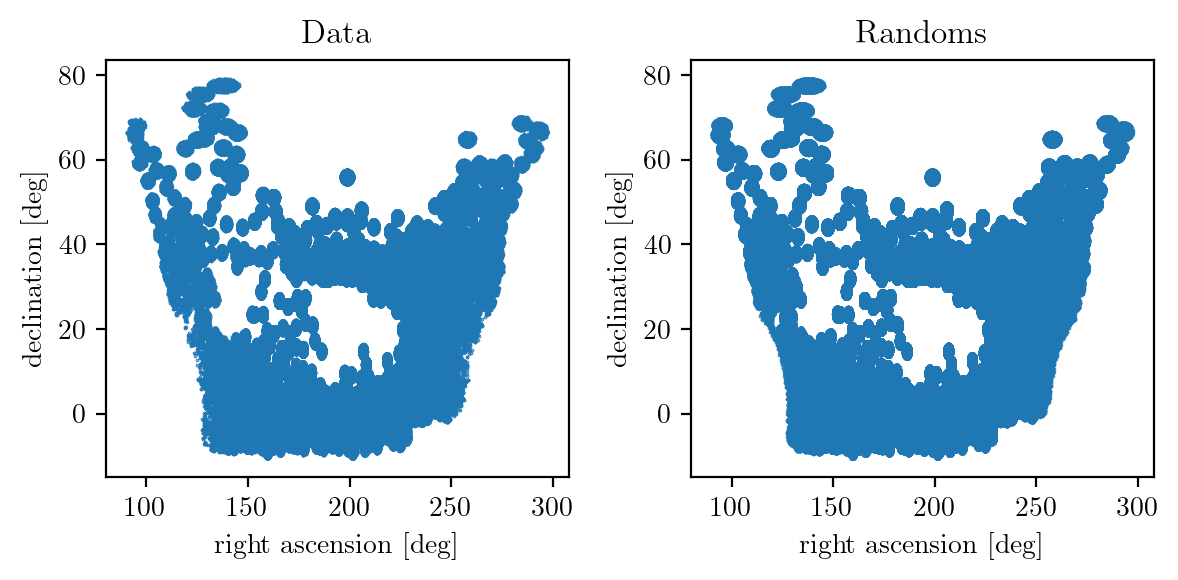

Plotting redshift distribution.


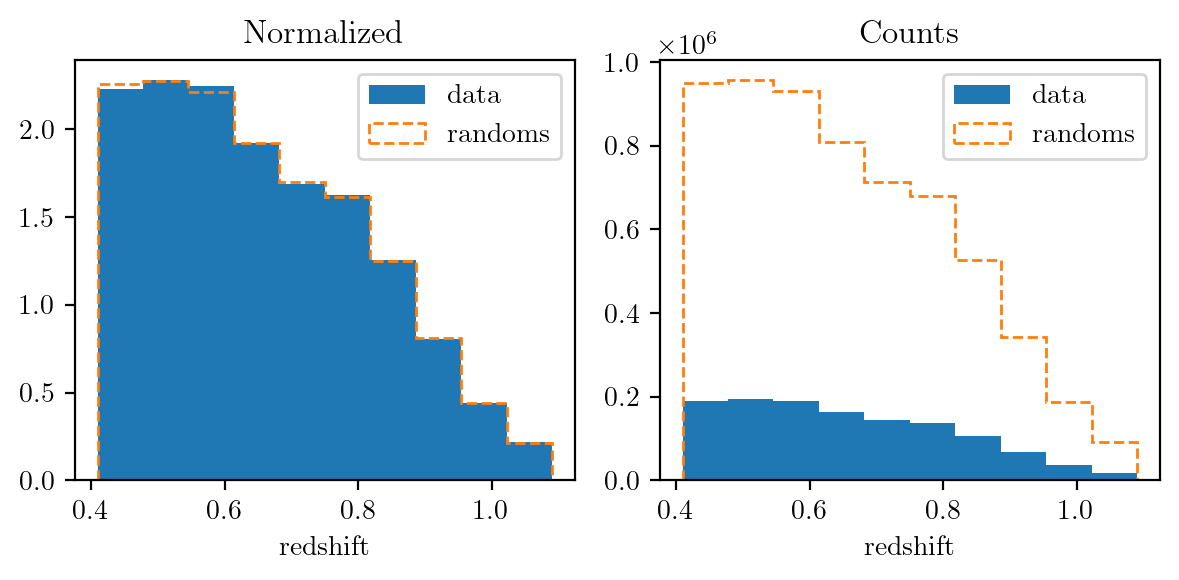

Plotting multipoles.


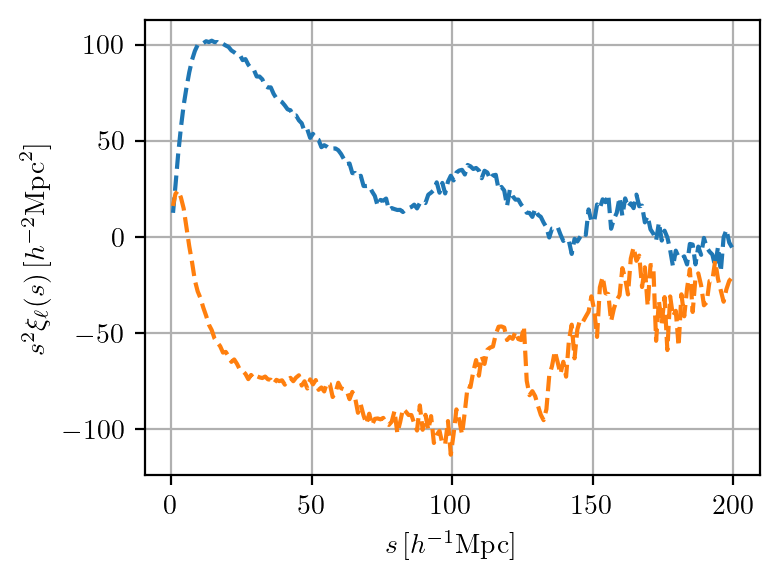

In [8]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction
import fitsio
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def plot_footprint():
    print('Plotting footprint.')
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].scatter(data_cutsky['RA'], data_cutsky['DEC'], s=0.1)
    ax[1].scatter(randoms_cutsky['RA'], randoms_cutsky['DEC'], s=0.1)
    ax[0].set_title('Data')
    ax[1].set_title('Randoms')
    for aa in ax:
        aa.set_xlabel('right ascension [deg]')
        aa.set_ylabel('declination [deg]')
    plt.tight_layout()
    # plt.savefig('footprint_multisnap.png', dpi=300)
    plt.show()
    
def plot_redshift_distribution():
    print('Plotting redshift distribution.')
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].hist(data_cutsky['Z'], density=True, label='data')
    ax[0].hist(randoms_cutsky['Z'], density=True, label='randoms', ls='--', histtype='step')
    ax[1].hist(data_cutsky['Z'], density=False, label='data')
    ax[1].hist(randoms_cutsky['Z'], density=False, label='randoms', ls='--', histtype='step')
    ax[0].set_title('Normalized')
    ax[1].set_title('Counts')
    for aa in ax:
        aa.set_xlabel('redshift')
        aa.legend()
    plt.tight_layout()
    # plt.savefig('redshift_distribution_multisnap.png', dpi=300)
    plt.show()
    
def plot_multipoles():
    print('Plotting multipoles.')
    import matplotlib.pyplot as plt
    s, multipoles = tpcf(ells=(0, 2), return_sep=True)
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(s, s**2 * multipoles[0], ls='--')
    ax.plot(s, s**2 * multipoles[1], ls='--')
    ax.grid()
    ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
    ax.set_ylabel(r'$s^2\xi_{\ell}(s)\,[h^{-2}{\rm Mpc}^2]$')
    plt.tight_layout()
    # plt.savefig('multipoles_multisnap.png', dpi=300)
    plt.show()
    

data_dir = '/pscratch/sd/e/epaillas/acm/desi/abacus/cutsky/'
data_fn = Path(data_dir) / 'LRG_NGC_c000_ph000_hod030.dat.fits'
data_cutsky = fitsio.read(data_fn)

randoms_dir = '/pscratch/sd/e/epaillas/acm/desi/abacus/cutsky/'
randoms_fn = Path(data_dir) / 'LRG_NGC_c000_ph000_hod030.ran.fits'
randoms_cutsky = fitsio.read(randoms_fn)

tpcf_dir = '/pscratch/sd/e/epaillas/acm/desi/abacus/cutsky/'
tpcf_fn = Path(data_dir) / 'tpcf_LRG_NGC_c000_ph000_hod030.fits.npy'
tpcf = TwoPointCorrelationFunction.load(tpcf_fn)


plot_footprint()
plot_redshift_distribution()
plot_multipoles()

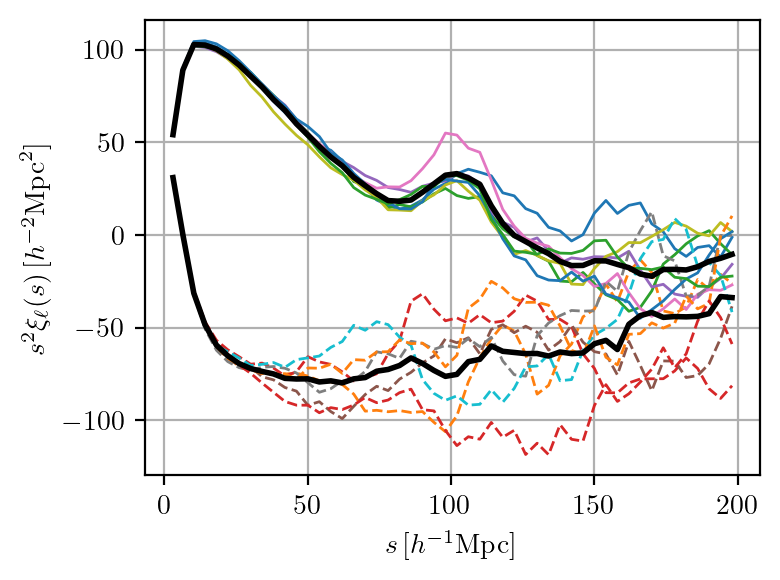

In [16]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction
import fitsio
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    
def plot_multipoles():
    print('Plotting multipoles.')
    import matplotlib.pyplot as plt
    s, multipoles = tpcf(ells=(0, 2), return_sep=True)
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(s, s**2 * multipoles[0], ls='--')
    ax.plot(s, s**2 * multipoles[1], ls='--')
    ax.grid()
    ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
    ax.set_ylabel(r'$s^2\xi_{\ell}(s)\,[h^{-2}{\rm Mpc}^2]$')
    plt.tight_layout()
    # plt.savefig('multipoles_multisnap.png', dpi=300)
    plt.show()
    

fig, ax = plt.subplots(figsize=(4, 3))

multipoles_avg = []
    
for phase_idx in range(7):

    tpcf_dir = '/pscratch/sd/e/epaillas/acm/desi/abacus/cutsky/'
    tpcf_fn = Path(data_dir) / f'tpcf_LRG_NGC_c000_ph{phase_idx:03}_hod030.fits.npy'
    tpcf = TwoPointCorrelationFunction.load(tpcf_fn)[::4]
    s, multipoles = tpcf(ells=(0, 2), return_sep=True)
    
    ax.plot(s, s**2 * multipoles[0], ls='-', lw=1.0)
    ax.plot(s, s**2 * multipoles[1], ls='--', lw=1.0)
    
    multipoles_avg.append(multipoles)
    
multipoles_avg = np.array(multipoles_avg).mean(axis=0)

ax.plot(s, s**2 * multipoles_avg[0], ls='-', color='k', lw=2.0)
ax.plot(s, s**2 * multipoles_avg[1], ls='-', color='k', lw=2.0)
    
ax.grid()
ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$s^2\xi_{\ell}(s)\,[h^{-2}{\rm Mpc}^2]$')
plt.tight_layout()
plt.show()

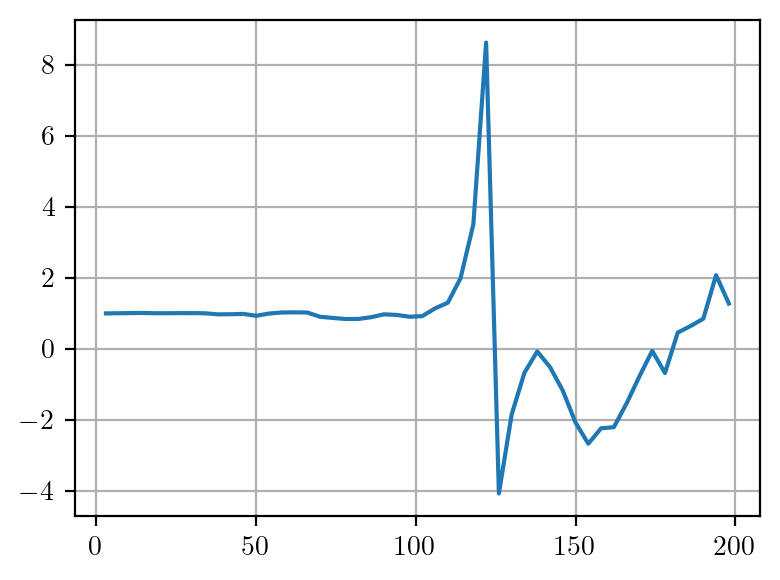

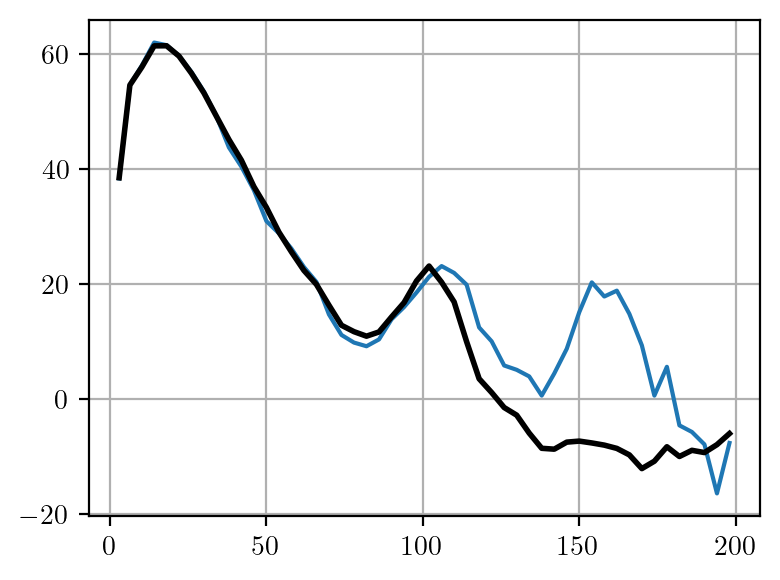

In [27]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction
import fitsio
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    

multipoles_phases = []
    
for phase_idx in range(7):
    tpcf_dir = '/pscratch/sd/e/epaillas/acm/desi/abacus/cutsky/'
    tpcf_fn = Path(data_dir) / f'tpcf_LRG_NGC_c000_ph{phase_idx:03}_hod002.fits.npy'
    tpcf = TwoPointCorrelationFunction.load(tpcf_fn)[::4]
    s, multipoles = tpcf(ells=(0, 2), return_sep=True)
    multipoles_phases.append(multipoles)
    
multipoles_phases = np.array(multipoles_phases)
multipoles_avg = multipoles_phases.mean(axis=0)


phase_correction = multipoles_phases[0] / multipoles_avg

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(s, phase_correction[0])
    
ax.grid()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(s, s**2 * multipoles_phases[0][0], ls='-')
ax.plot(s, s**2 * multipoles_avg[0], ls='-', color='k', lw=2.0)
# ax.plot(s, s**2 * multipoles_avg[1], ls='-', color='k', lw=2.0)
    
ax.grid()
# ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
# ax.set_ylabel(r'$s^2\xi_{\ell}(s)\,[h^{-2}{\rm Mpc}^2]$')
plt.tight_layout()
plt.show()